In [5]:
import pandas as pd #data frame
import numpy as np #mathematical use
import seaborn as sns
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
# "% matplotlib inline" tells to display matplotlib plots directly within the notebook output cells, instead of opening them in a separate window


In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
#Here we are writing the name of the file directly coz it's located in the same folder. 
#If the csv file is located in another folder we need to provide the location path of the file.
#to avoid encoding error, encoding = 'unicode_escape' is used.

In [7]:
df.shape #displays the number of rows and columns

(11251, 15)

In [8]:
df.head() #displays the first 5 rows || data.head(20) - displays the first 20 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()  #displays the information of the data types and other details of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#In the above info Status and unnamed1 are having 0 values so we can delete the two columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
#axis =1 makes sure the whole column is deleted, inplace = True make sure the change is saved

In [11]:
#to check how many null values are there in each columns
pd.isnull(df).sum() 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# dropping null values
df.dropna(inplace=True)

In [13]:
df.shape #checking if the rows containing null values are deleted or not

(11239, 13)

In [14]:
# changing the data type
df['Amount'] = df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes #checking the changed data type

dtype('int32')

In [16]:
# renaming the columns 
df.rename(columns = {'Marital_Status': 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [17]:
df.describe() # returning the description of data in the Dataframe (i.e. count, mean, std, etc)

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
df[['Gender','Age Group','Age']].describe() # describing the data for specific columns only 
# below only age are displayed coz we can't find the mean, count, etc for str data type

,Age
count,11239.000000
mean,35.410357
std,12.753866
min,12.000000
25%,27.000000
50%,33.000000
75%,43.000000
max,92.000000


# Exploratory Data Analysis

### Gender

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

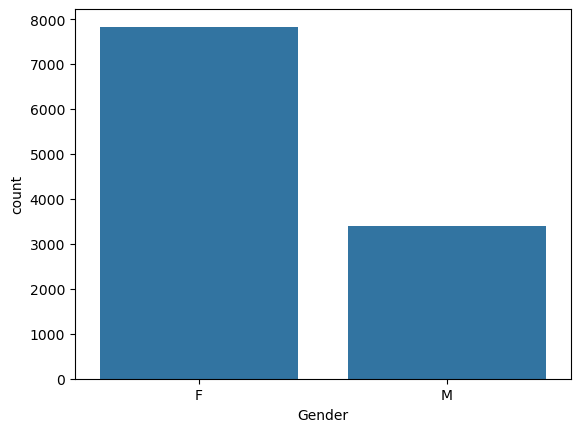

In [20]:
ax = sns.countplot(x = 'Gender', data = df) #displays the graph without the numbers of male and female on the top
plt.show()

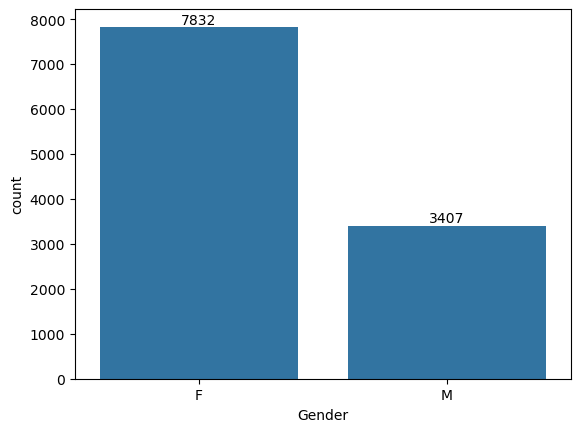

In [21]:
ax = sns.countplot(x = 'Gender', data = df) #displays the graph without the numbers of male and female on the top

for bars in ax.containers: # creates container for storing the values of male and female to be displayed on the graph
    ax.bar_label(bars)   

plt.show()

In [22]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


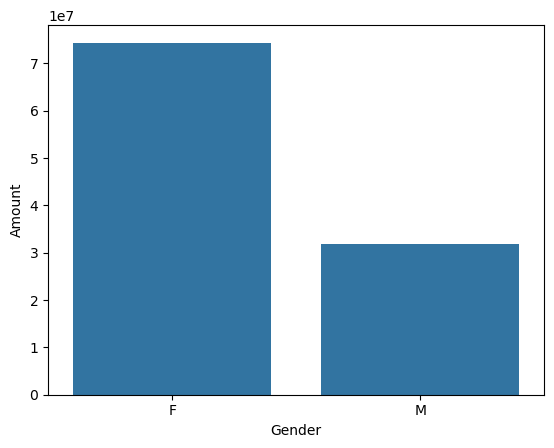

In [23]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False) #creating a variable to store the sorted coulmn

sns.barplot(x = 'Gender',y ='Amount', data = sales_gen) #sns.barplot is used for aggregated values
plt.show()

#### From the above graph we see that women buyers are more than male buyers and the amount spend by women is also more than the male.

### AGE

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

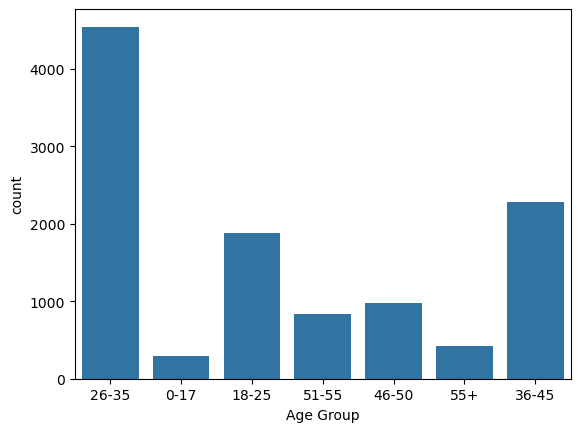

In [25]:
#displaying the number of people in different age groups

sns.countplot(data = df, x = 'Age Group') 
plt.show()

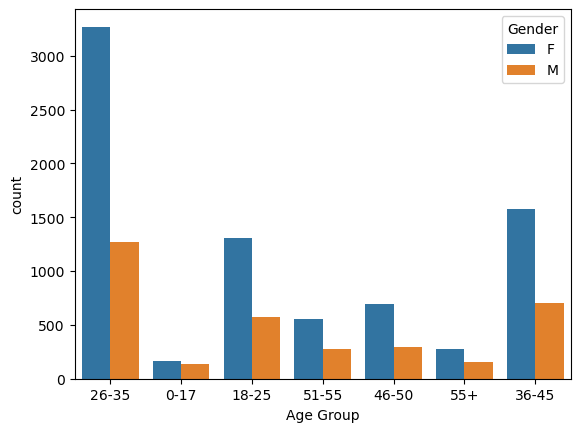

In [26]:
# Displaying the graph without numbers on the top with gender classification
sns.countplot(data = df, x = 'Age Group', hue = 'Gender') #display the number of people in different age groups with category as gender
plt.show()

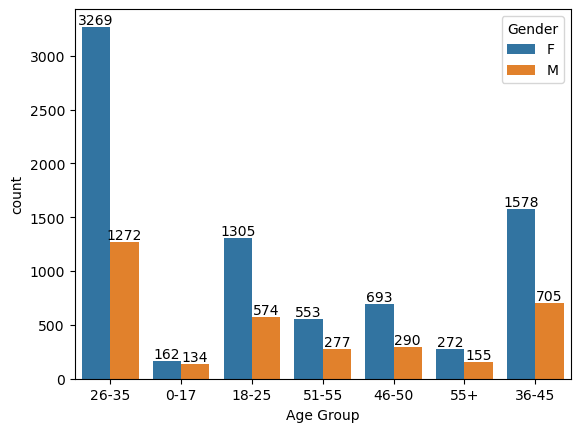

In [27]:
# Displaying the graph with numbers on the top
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender') #display the number of people in different age groups with category as gender
for bars in ax.containers: # creates container for storing the values of male and female to display the numbers on the graph 
    ax.bar_label(bars) 
plt.show()

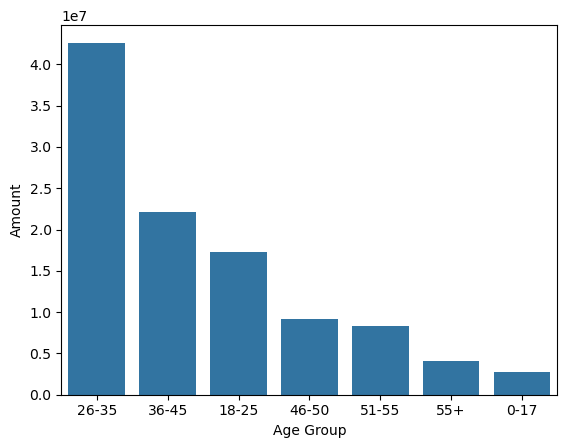

In [28]:
#Plotting graph of Total Amount vs Age Group

#grouping and sorting the data
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

#creating the barplot
sns.barplot(x= 'Age Group', y ='Amount', data=sales_age)

# Show the plot
plt.show()

### From the above graph we observe that the age group of 26-35 spend most of the amount on buying things

### STATE

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

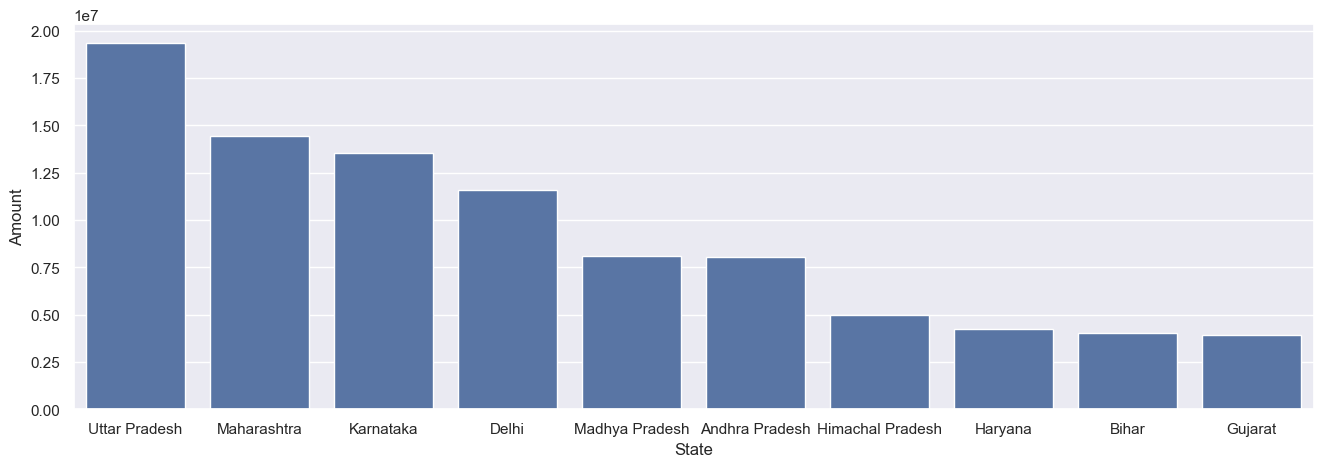

In [30]:
# displaying the total amount/sales from top 10 states

# grouping and sorting of amount for each state
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

#providing the size of the bars in the graph
sns.set(rc={'figure.figsize':(16,5)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

plt.show()

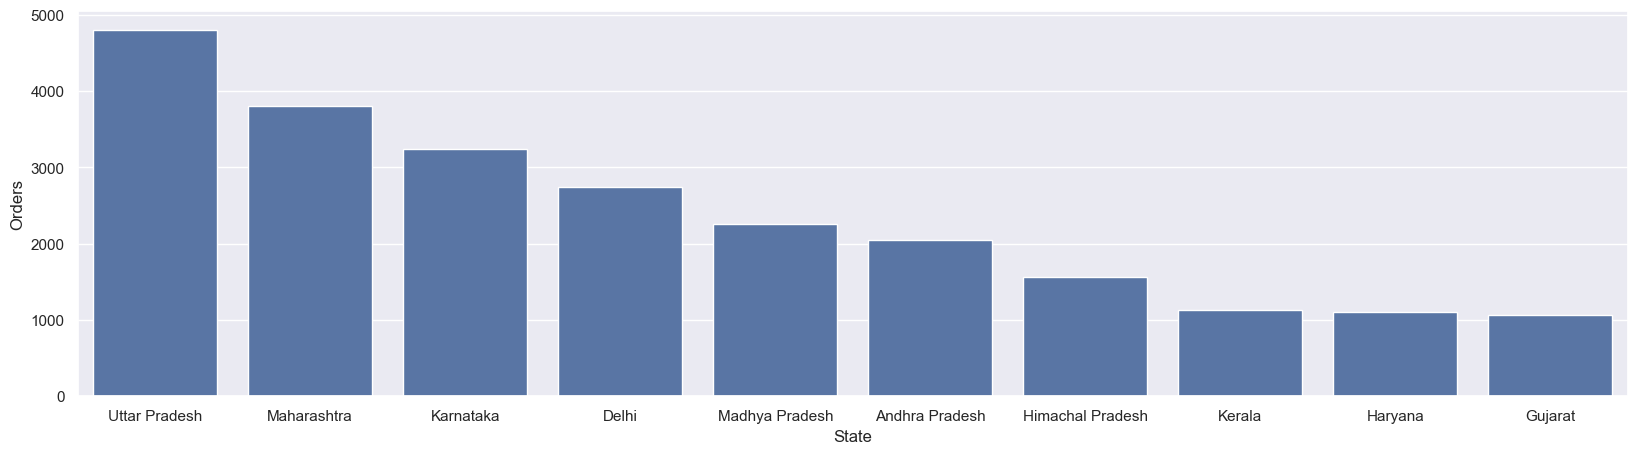

In [31]:
# displaying the total orders from top 10 states

# grouping and sorting of amount for top 10 highest state 
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10) # head(10) returns the top 10

#providing the size of the bars in the graph
sns.set(rc={'figure.figsize':(20,5)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

plt.show()

### From the above graphs we can see that most of the orders and revenue amounts comes from UP, Maharastra and Karnataka.

### MARITAL STATUS

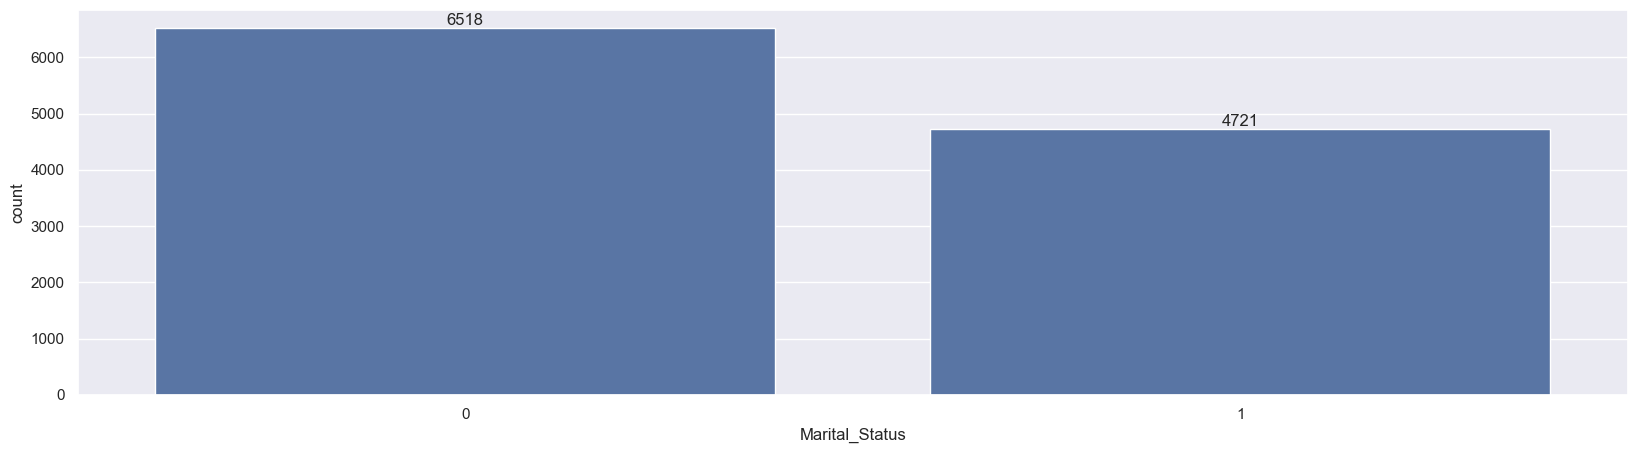

In [32]:
#display the number of sales according to the marital status
ax = sns.countplot(data = df, x = 'Marital_Status')

# creates container for storing the values of marital_status to display the numbers on the graph 
for bars in ax.containers:
    ax.bar_label(bars)

#providing size of the bar graph
sns.set(rc={'figure.figsize':(7,5)})

plt.show()

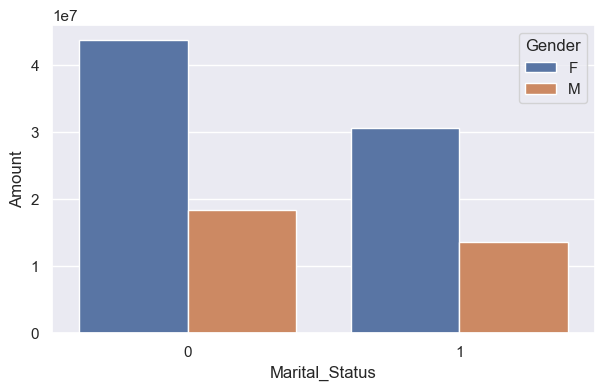

In [33]:
#display the amount according to the marital status and gender
# grouping and sorting of amount for each marital_status
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

#providing the size of the bars in the graph
sns.set(rc={'figure.figsize':(7,4)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_marital_status, x = 'Marital_Status',y= 'Amount', hue = 'Gender')

plt.show()

### From the graph above married women purchase more products

### Occupation

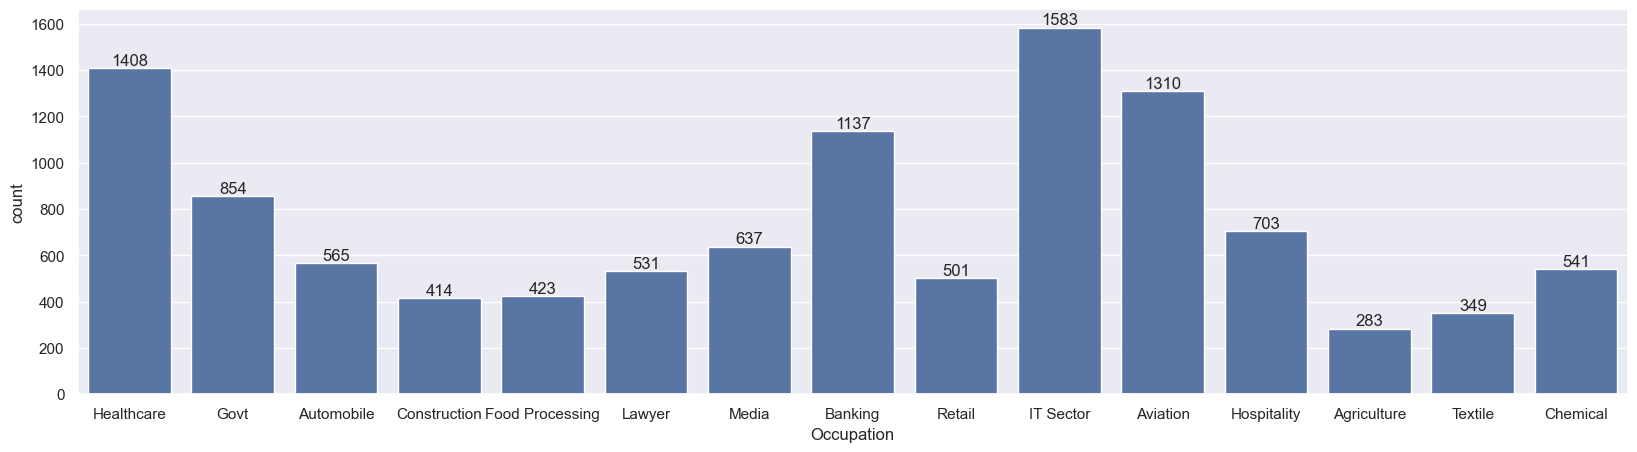

In [39]:
sns.set(rc={'figure.figsize':(20,5)}) #setting the size of bar graph
ax = sns.countplot(data = df, x = 'Occupation') #assigning variables for displaying the count numbers on top of the bar graph

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

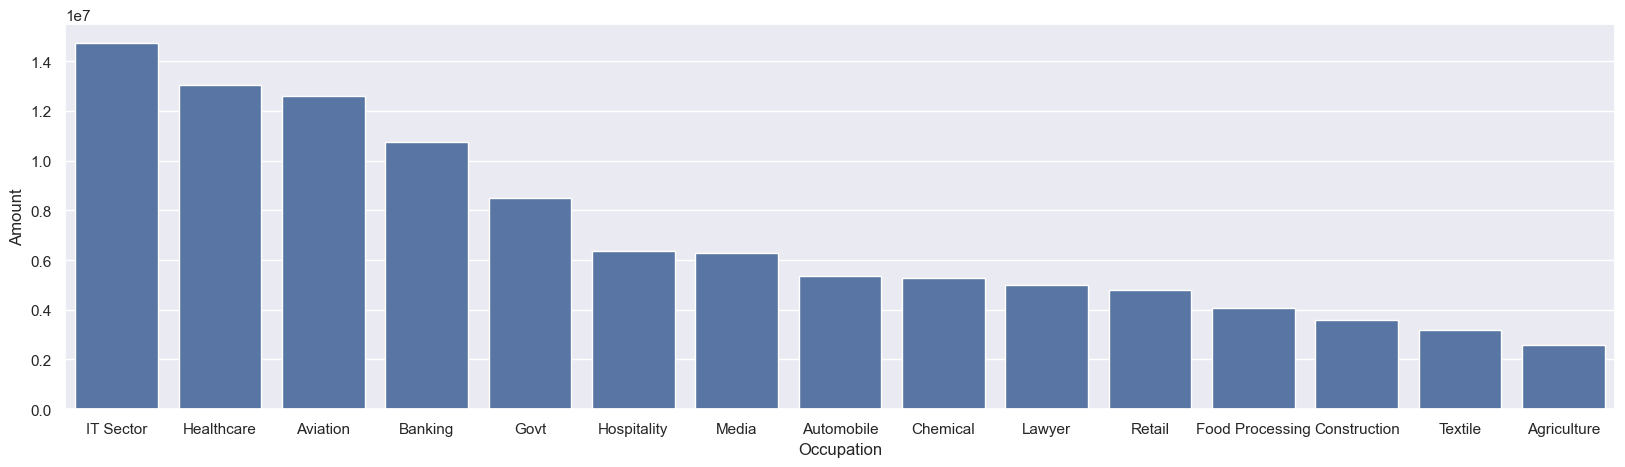

In [42]:
#plotting the graph of buyer's amounts for each occupation

sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_occupation, x = 'Occupation',y= 'Amount')

plt.show()

#### From the above graph we see that people from IT sector, healthcare and aviation sectors are most of the buyers

### Product Category

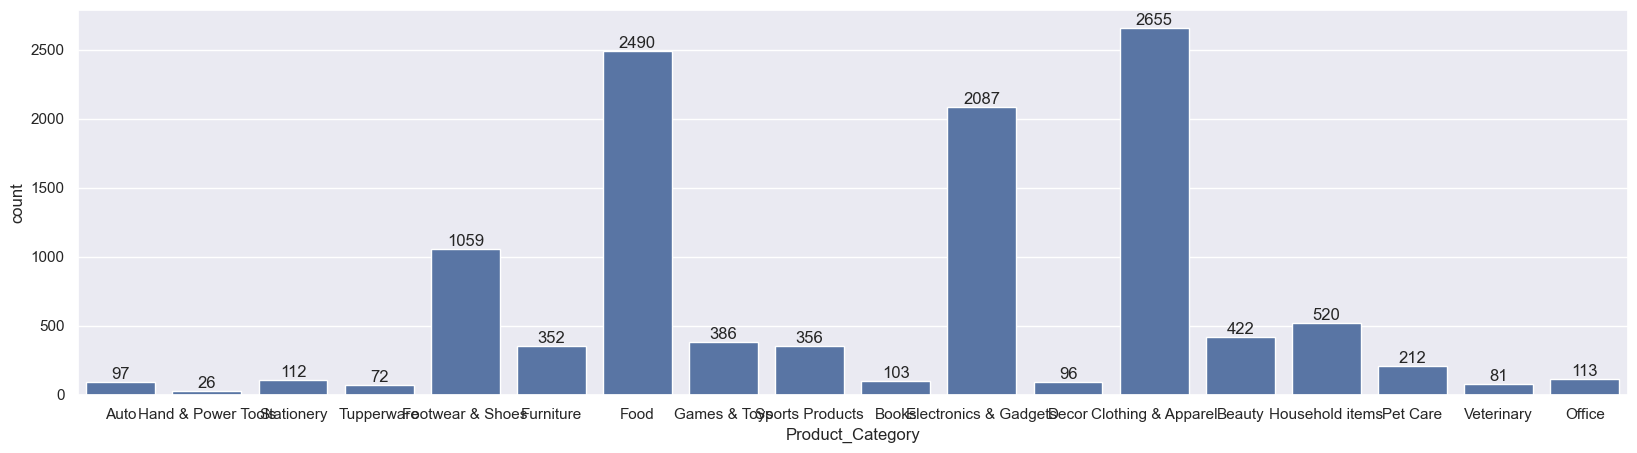

In [57]:
#display the number of buyers according to the product category
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:  # creates container for storing the values of marital_status to display the numbers on the graph 
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(30,5)})  #providing size of the bar graph
plt.show()

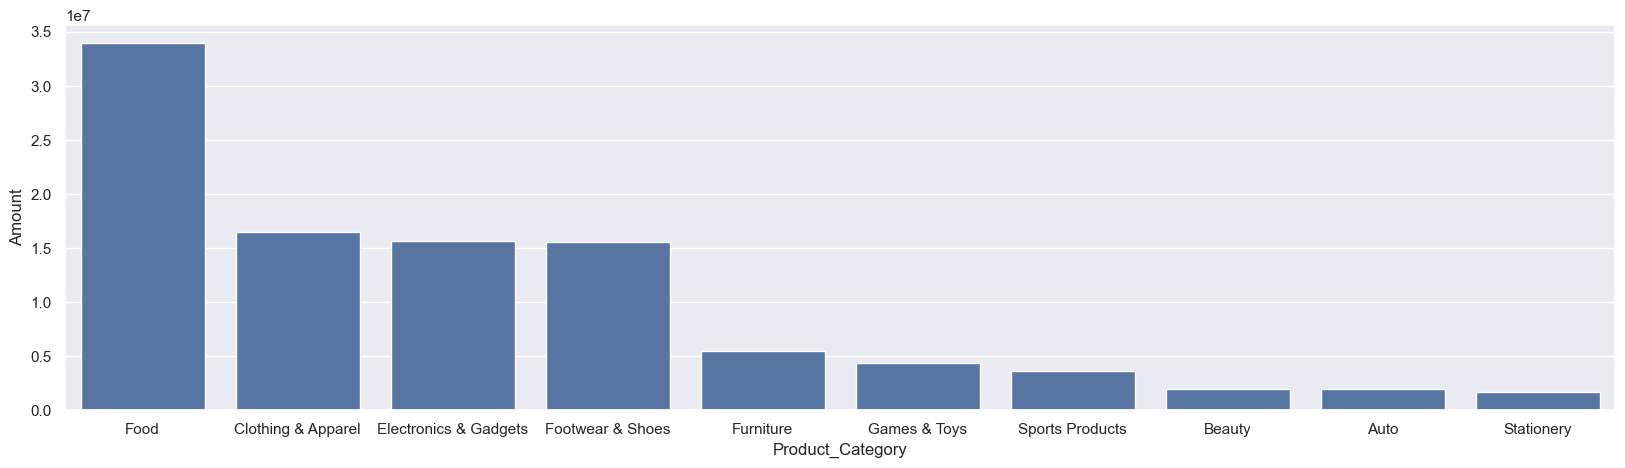

In [56]:
#plotting the graph of buyer's amounts for top 10 Product_Category

sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_product_category, x = 'Product_Category',y= 'Amount')

plt.show()

#### The most sold products are Food, Clothing & Apparel and Electronics category

### Top Selling Product ID

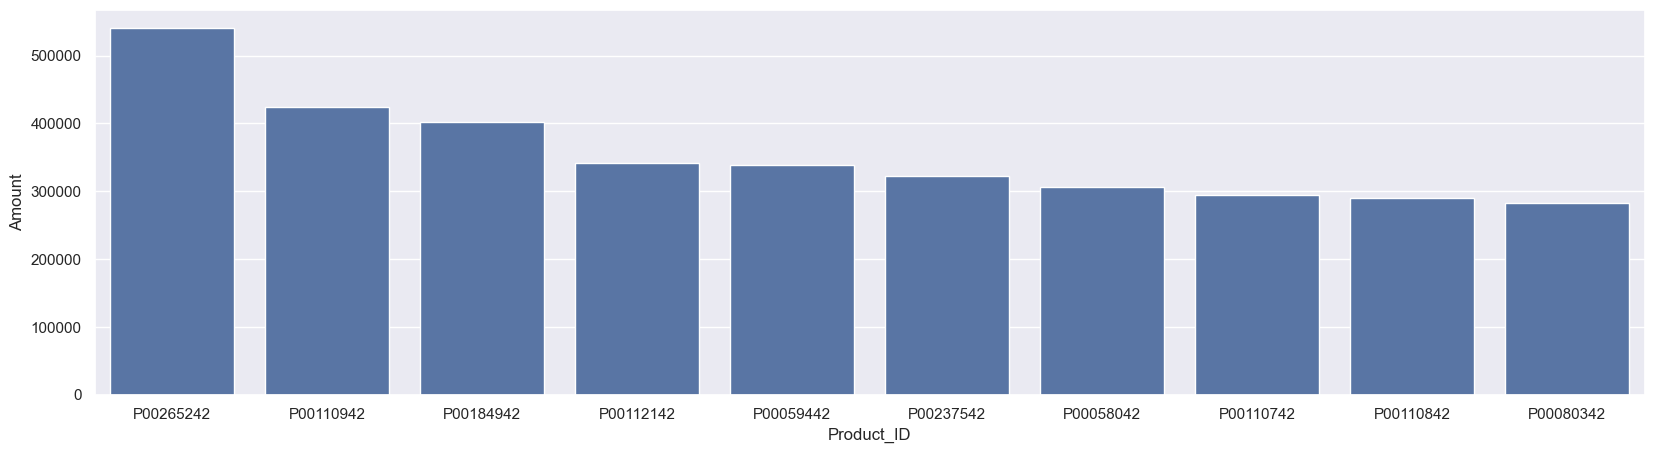

In [55]:
# displaying the amount of Top 10 selling product ID
sales_product_ID = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

# plotting the graph, labeling the x and y axis
sns.barplot(data = sales_product_ID, x = 'Product_ID',y= 'Amount')

plt.show()

<Figure size 3000x500 with 0 Axes>

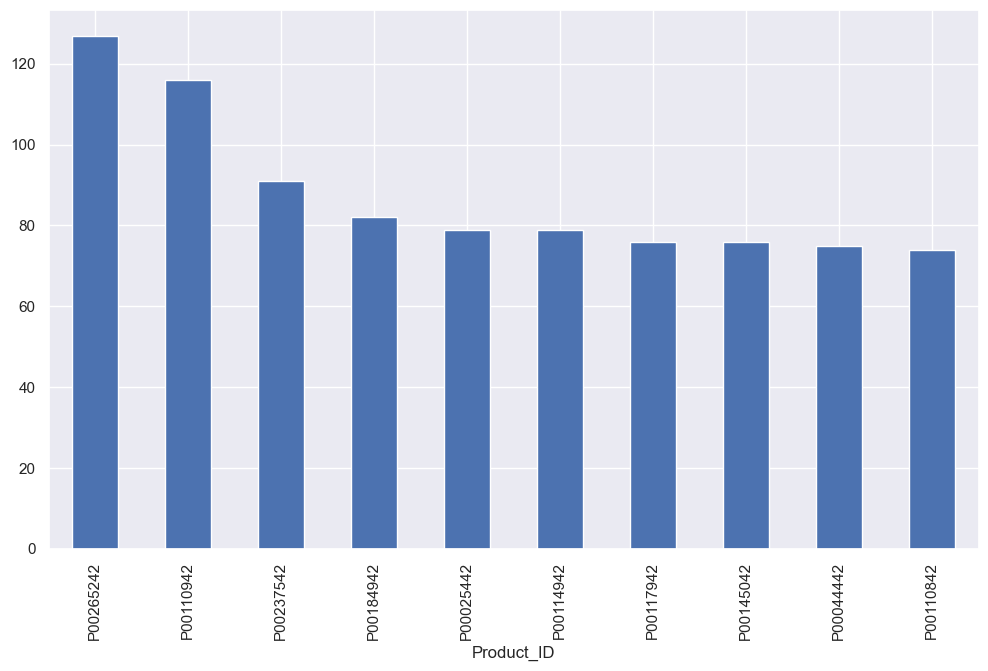

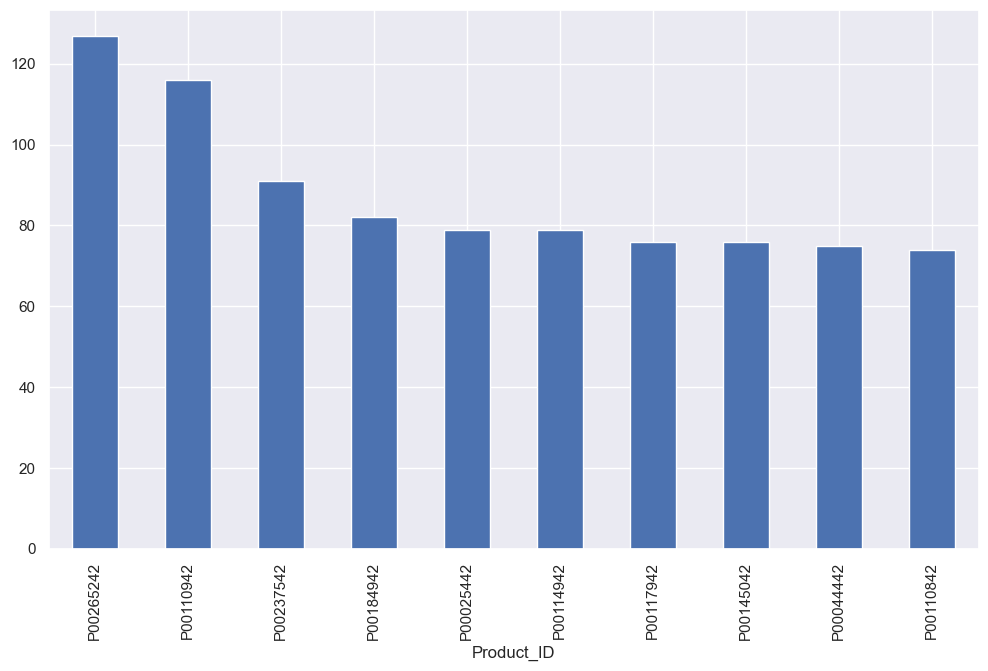

In [61]:
# Top 10 most sold products (same as the above but different code0

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

## Conclusion:

#### Married Women in the age group of 26-35 working in the IT Industry, Healthcare and Aviation industry who are from UP, Maharastra and Karnataka are more likely to buy products from Food, Clothing and Electronics Category